In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px

In [2]:
cdf = pd.read_csv('cleaned_data.csv')
cdf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,TotalPrice
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039.0,Australia,0.47,Bank Transfer,0.00,Apparel,In-store,Not Returned,UPS,London,Medium,64.98
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144.0,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium,742.50
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,-1426.39
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586.0,Netherlands,0.14,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low,1073.52
4,744167,SKU_1006,Office Chair,47,2020-01-01 05:00:00,70.16,53887.0,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium,3297.52


In [3]:
# Get basic information about the dataset
cdf.info()

# Summary statistics
cdf.describe()

# Check for null values
print(cdf.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47293 entries, 0 to 47292
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          47293 non-null  int64  
 1   StockCode          47293 non-null  object 
 2   Description        47293 non-null  object 
 3   Quantity           47293 non-null  int64  
 4   InvoiceDate        47293 non-null  object 
 5   UnitPrice          47293 non-null  float64
 6   CustomerID         47293 non-null  object 
 7   Country            47293 non-null  object 
 8   Discount           47293 non-null  float64
 9   PaymentMethod      47293 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           47293 non-null  object 
 12  SalesChannel       47293 non-null  object 
 13  ReturnStatus       47293 non-null  object 
 14  ShipmentProvider   47293 non-null  object 
 15  WarehouseLocation  47293 non-null  object 
 16  OrderPriority      472

In [4]:
# Total Revenue: Sum of all TotalPrice values
total_revenue = cdf['TotalPrice'].sum()
print(f"Total Revenue: {total_revenue}")

total_revenue_ex_returns = cdf[cdf['ReturnStatus'] != 'Returned']['TotalPrice'].sum()
print(f"Total Revenue (Excluding Returns): {total_revenue_ex_returns}")

Total Revenue: 47923706.28
Total Revenue (Excluding Returns): 53712750.05


In [5]:
# Group by 'Category' and sum 'TotalPrice', then format as currency
revenue_by_category = cdf.groupby('Category')['TotalPrice'].sum()
print(revenue_by_category.apply)

<bound method Series.apply of Category
Accessories    9662620.48
Apparel        9462403.72
Electronics    9594722.62
Furniture      9621168.11
Stationery     9582791.35
Name: TotalPrice, dtype: float64>


In [6]:
# Group by 'Description', sum 'Quantity', sort descending, and show top 10
top_products = cdf.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(top_products.apply)

<bound method Series.apply of Description
USB Cable         109279
Wall Clock        108922
White Mug         108415
Backpack          108300
Desk Lamp         107857
Office Chair      106794
Wireless Mouse    106159
Blue Pen          105870
T-shirt           105784
Headphones        105357
Notebook          104555
Name: Quantity, dtype: int64>


In [7]:
# Calculate and sort total revenue by country
revenue_by_country = cdf.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
print(revenue_by_country)

Country
Sweden            4110823.63
Belgium           4090622.18
United Kingdom    4057380.42
Spain             4047496.69
Portugal          4021693.41
France            4013505.22
Norway            3997147.92
United States     3990798.03
Germany           3978510.05
Netherlands       3915038.48
Italy             3883877.53
Australia         3816812.72
Name: TotalPrice, dtype: float64


In [8]:
# Sales Channel Performance: Calculate revenue by SalesChannel
sales_channel_revenue = cdf.groupby('SalesChannel')['TotalPrice'].sum()
print("Revenue by Sales Channel:")
print(sales_channel_revenue)

Revenue by Sales Channel:
SalesChannel
In-store    24023619.18
Online      23900087.10
Name: TotalPrice, dtype: float64


In [9]:
# Total Shipping Costs: Sum of all ShippingCost values
total_shipping_costs = cdf['ShippingCost'].sum()
print(f"Total Shipping Costs: {total_shipping_costs:.2f}")

Total Shipping Costs: 414782.54


In [10]:
# Most Popular Payment Method: Count occurrences of each PaymentMethod
popular_payment_method = cdf['PaymentMethod'].value_counts().idxmax()
print(f"Most Popular Payment Method: {popular_payment_method}")

Most Popular Payment Method: Bank Transfer


In [16]:
# Group by country and calculate total revenue
revenue_by_country = cdf.groupby('Country')['TotalPrice'].sum().reset_index()

# Create a choropleth map for revenue by country
fig = px.choropleth(revenue_by_country, 
                    locations='Country', 
                    locationmode='country names',  # This uses country names
                    color='TotalPrice',  # Color by total revenue
                    hover_name='Country', 
                    color_continuous_scale='Viridis',  # Choose a color scale
                    labels={'TotalPrice': 'Total Revenue ($)'}, 
                    title='Revenue by Country')

# Show the map
fig.show()

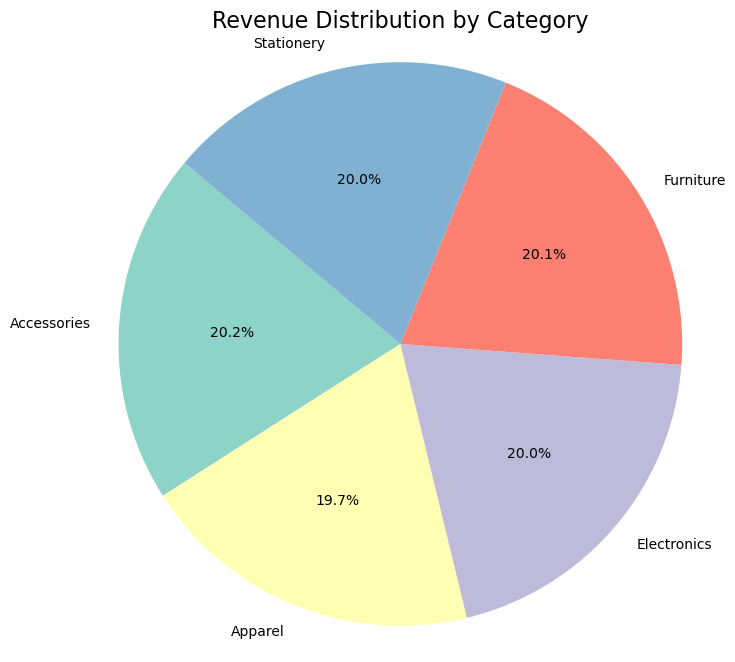

In [12]:
# Grouping by Category and summing TotalPrice for each category
revenue_by_category = cdf.groupby('Category')['TotalPrice'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_category, labels=revenue_by_category.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(revenue_by_category)))

plt.title('Revenue Distribution by Category', fontsize=16)

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [13]:
# Ensure 'InvoiceDate' is a datetime object
cdf['InvoiceDate'] = pd.to_datetime(cdf['InvoiceDate'], errors='coerce')  # Convert, handling invalid values

# Check the type of 'InvoiceDate' after conversion to make sure it's a datetime object
print(cdf['InvoiceDate'].dtype)

# Extract year and month from the 'InvoiceDate'
cdf['YearMonth'] = cdf['InvoiceDate'].dt.to_period('M')

# Group by YearMonth and sum the total revenue
revenue_by_month = cdf.groupby('YearMonth')['TotalPrice'].sum()

# Print to check the results
print(revenue_by_month)

datetime64[ns]
YearMonth
2020-01    701572.37
2020-02    671347.17
2020-03    716926.09
2020-04    740177.46
2020-05    705210.52
             ...    
2025-05    746022.47
2025-06    639367.70
2025-07    708068.58
2025-08    739421.45
2025-09     97172.78
Freq: M, Name: TotalPrice, Length: 69, dtype: float64


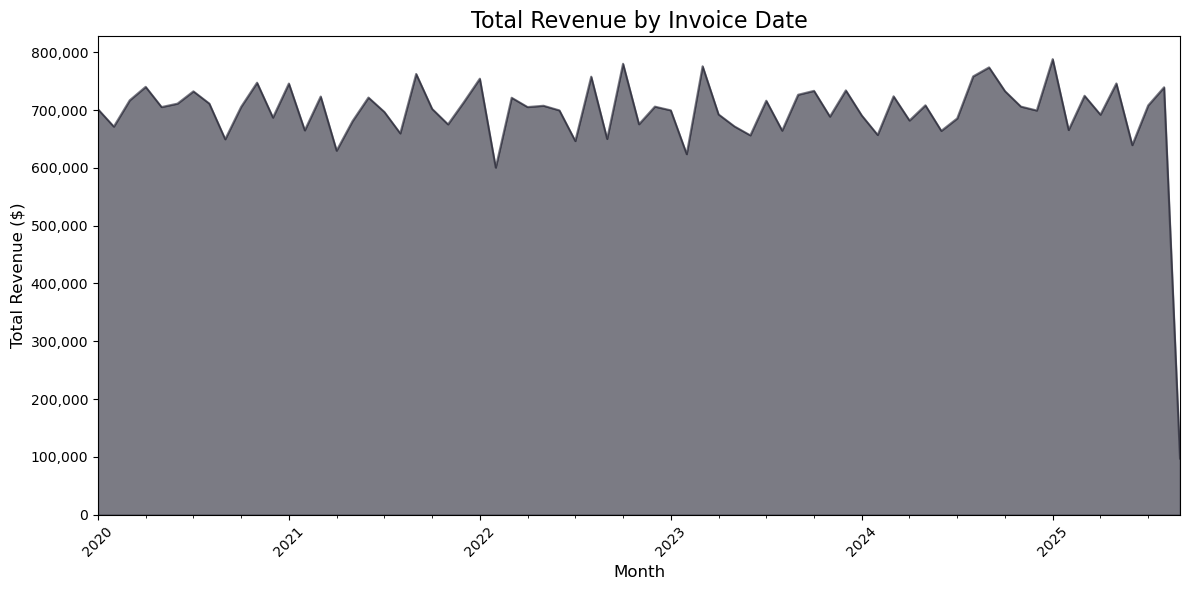

In [14]:
dark_blues = sns.dark_palette("blue", n_colors=len(revenue_by_month))

# Create a stacked area chart for total revenue by month
plt.figure(figsize=(12, 6))

# Convert the revenue by month data to a format suitable for area chart
revenue_by_month.plot(kind='area', color=dark_blues, alpha=0.6)

plt.title('Total Revenue by Invoice Date', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)

plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Show the plot
plt.tight_layout()
plt.show()

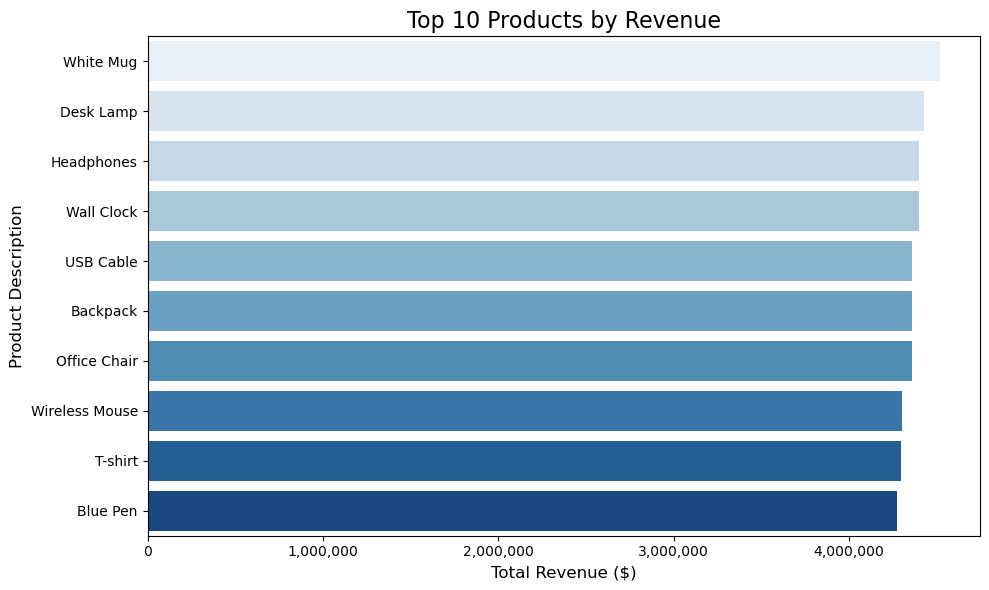

In [15]:
# Group by product description and sum total revenue, sort by descending order, and select top 10
top_products_revenue = cdf.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# horizontal bar chart for the top 10 products by revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, palette='Blues')

plt.title('Top 10 Products by Revenue', fontsize=16)
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Product Description', fontsize=12)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Show the plot
plt.tight_layout()
plt.show()
